In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax, ReLU, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

### Load and preprocess the data

In [2]:
# Load the mnist data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# convert the labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


### Define the model

In [3]:
# defining the model
model = Sequential()

# input layer
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', input_shape=(28,28,1)))
model.add(ReLU())

# Convolutional layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(ReLU())

# Max pooling layer 1
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# Convolutional layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(ReLU())

# MAx pooling layer 2
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

# faltten layer
model.add(Flatten())

# fully connected layer
model.add(Dense(units = 128))
model.add(ReLU())

# output layer
model.add(Dense(units = 10))
model.add(Softmax())




### Compiling the layer

In [4]:
# Compile the layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [5]:
# training the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 142s 94ms/step - loss: 0.1314 - accuracy: 0.9589 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 2/10
1500/1500 [==============================] - 139s 92ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0399 - val_accuracy: 0.9877
Epoch 3/10
1500/1500 [==============================] - 136s 91ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0477 - val_accuracy: 0.9849
Epoch 4/10
1500/1500 [==============================] - 140s 93ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0406 - val_accuracy: 0.9890
Epoch 5/10
1500/1500 [==============================] - 138s 92ms/step - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.0342 - val_accuracy: 0.9910
Epoch 6/10
1500/1500 [==============================] - 139s 93ms/step - loss: 0.0120 - accuracy: 0.9960 - val_loss: 0.0457 - val_accuracy: 0.9887
Epoch 7/10
1500/1500 [==============================] - 138s 92ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0

### Evaluate the model

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 8s 25ms/step - loss: 0.0329 - accuracy: 0.9905
Test Loss: 0.03289685398340225
Test Accuracy: 0.9904999732971191


### Test on new input data

Enter an index number under 10000 5000


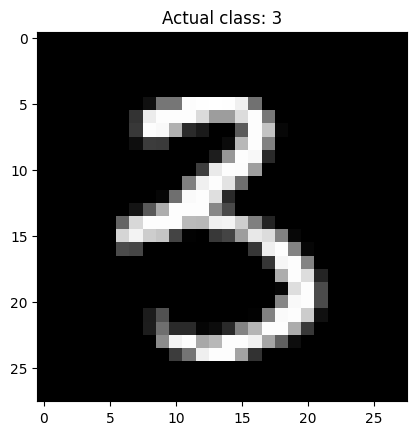

In [10]:
# Defining function to classify new input
def classify_new_input(model, input):
  # preprocess the input
  input = input.reshape(1, 28, 28, 1)

  # get the model prediction
  prediction = model.predict(input)

  return np.argmax(prediction)

# Select a new image index
image_index = int(input("Enter an index number under 10000 "))

# Display the image in image_index
plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')
plt.title(f"Actual class: {np.argmax(y_test[image_index])}")
plt.show()


### testing our function with image_index test image

In [11]:
# Classify the image_index test image
predicted_class = classify_new_input(model, x_test[image_index])
print(f"Predicted class: {predicted_class}")

# Printing the actual class to compare
actual_class = np.argmax(y_test[image_index])
print(f"Actual class: {actual_class}")

# Declaring the final prediction accuracy
if predicted_class == actual_class:
  print("Correct prediction")
else:
  print("Incorrect prediction")



1/1 [==============================] - 0s 26ms/step
Predicted class: 3
Actual class: 3
Correct prediction
